In [37]:
import polars as pl
from matplotlib import pyplot as plt

from cci.utils import project_dir

In [38]:
res_dir = project_dir() / "results/CNN_even_bigger_kernel_mlp_full_fixed/130"  # 1N
title = "Full"
# res_dir = project_dir() / "results/CNN_even_bigger_kernel_mlp_full_fixed/28"  # 2N
# res_dir = project_dir() / "results/CNN_even_bigger_kernel_mlp_full_fixed/121"  # 3N
# res_dir = project_dir() / "results/CNN_bigger_kernel_full_fixed/160"

# res_dir = project_dir() / "results/CNN_bigger_kernel_pr_fixed/102"
# title = "PR"
# res_dir = project_dir() / "results/CNN_bigger_kernel_as_fixed/151"
# title = "AS"
# res_dir = project_dir() / "results/CNN_bigger_kernel_pe_fixed/6"
# title = "PE"
# res_dir = project_dir() / "results/CNN_bigger_kernel_vft_fixed/196"
# title = "VF/VT"

res_dir = project_dir() / "results/CNN_even_bigger_kernel_mlp_pr_fixed/171"
title = "PR"
# res_dir = project_dir() / "results/CNN_even_bigger_kernel_mlp_as_fixed/64"
# title = "AS"
# res_dir = project_dir() / "results/CNN_even_bigger_kernel_mlp_pe_fixed/141"
# title = "PE"
# res_dir = project_dir() / "results/CNN_even_bigger_kernel_mlp_vft_fixed/180"
# title = "VF/VT"

In [39]:
def get_df(group) -> pl.DataFrame:
    df = pl.read_csv(res_dir / f"0_{group}.csv").with_columns(
        pl.lit(0).alias("fold"),
        pl.lit(group).alias("group"),
        pl.lit(f"{group}_0").alias("identifier"),
    )

    try:
        for i in range(1, 5):
            df = df.vstack(
                pl.read_csv(res_dir / f"{i}_{group}.csv").with_columns(
                    pl.lit(i).alias("fold"),
                    pl.lit(group).alias("group"),
                    pl.lit(f"{group}_{i}").alias("identifier"),
                )
            )
    except:
        pass

    return df


df = get_df("train")

df = df.vstack(get_df("val"))
df

epoch,acc,loss,f1,auroc,precision,recall,specificity,bac,TP,FP,FN,TN,fold,group,identifier
i64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i32,str,str
1,0.350582,0.2436,0.435955,0.423987,0.769841,0.304075,0.57037,0.437223,77,58,444,194,0,"""train""","""train_0"""
2,0.601552,0.241892,0.72695,0.521363,0.836735,0.642633,0.407407,0.52502,55,80,228,410,0,"""train""","""train_0"""
3,0.796895,0.241924,0.885652,0.528306,0.827211,0.952978,0.059259,0.506119,8,127,30,608,0,"""train""","""train_0"""
4,0.554981,0.242192,0.684404,0.50663,0.825221,0.584639,0.414815,0.499727,56,79,265,373,0,"""train""","""train_0"""
5,0.495472,0.242246,0.611554,0.520748,0.838798,0.481191,0.562963,0.522077,76,59,331,307,0,"""train""","""train_0"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
996,0.710526,0.575975,0.789272,0.756589,0.919643,0.691275,0.780488,0.735881,32,9,46,103,0,"""val""","""val_0"""
997,0.731579,0.574247,0.806084,0.756261,0.929825,0.711409,0.804878,0.758144,33,8,43,106,0,"""val""","""val_0"""
998,0.726316,0.563796,0.801527,0.76199,0.929204,0.704698,0.804878,0.754788,33,8,44,105,0,"""val""","""val_0"""


In [40]:
# fig, ax = plt.subplots(3, 2, figsize=(12, 12))
# ax = ax.ravel()
# for i, a in enumerate(ax):
#     train = df.filter(pl.col("identifier") == f"train_{i}")
#     val = df.filter(pl.col("identifier") == f"val_{i}")
#     train_bac = train.select("bac").to_numpy()
#     val_bac = val.select("bac").to_numpy()
#     a.plot(train_bac)
#     a.plot(val_bac)
#     if len(val_bac) == 0:
#         a.set_visible(False)
# plt.savefig(res_dir / "bac.png")

In [41]:
# import numpy as np
# import seaborn as sns

# test_df = pl.read_csv(res_dir / "*_test.csv").drop("epoch")
# test_df

# for i, (tp, fp, fn, tn) in enumerate(test_df.select(["TP", "FP", "FN", "TN"]).rows()):
#     cm = np.array([[tp, fp], [fn, tn]]).astype("float")
#     normalized_cm = cm / cm.sum(axis=1)[:, np.newaxis]
#     ax = sns.heatmap(
#         normalized_cm,
#         annot=True,
#         linewidths=0.01,
#         cmap="Oranges",
#         linecolor="gray",
#         vmin=0.0,
#         vmax=1.0,
#     )
#     ax.xaxis.set_ticklabels(["Good", "Bad"])
#     ax.yaxis.set_ticklabels(["Good", "Bad"])
#     plt.xlabel("Predicted Label")
#     plt.ylabel("True Label")
#     plt.title(f"{title} - {i}")
#     plt.savefig(res_dir / f"conf_{i}.png")
#     plt.close()

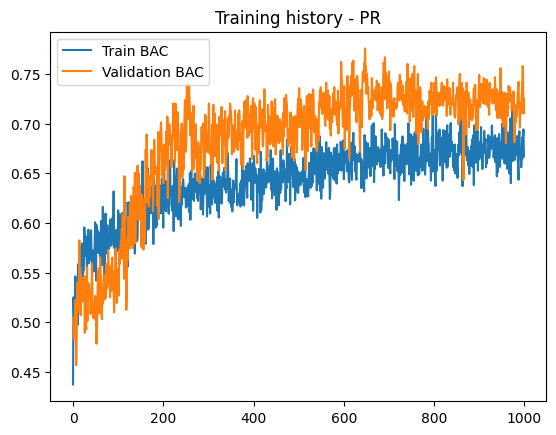

In [42]:
train = df.filter(pl.col("identifier") == "train_0")
val = df.filter(pl.col("identifier") == "val_0")
train_bac = train.select("bac").to_numpy()
val_bac = val.select("bac").to_numpy()

plt.plot(train_bac, label="Train BAC")
plt.plot(val_bac, label="Validation BAC")

plt.title(f"Training history - {title}")
plt.legend(loc="upper left")
plt.savefig(res_dir / "bac.png")

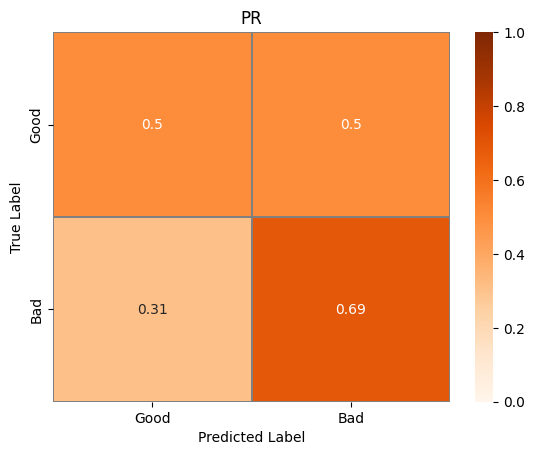

In [43]:
import numpy as np
import seaborn as sns

test_df = pl.read_csv(res_dir / "*_test.csv").drop("epoch")
test_df
for tp, fp, fn, tn in test_df.select(["TP", "FP", "FN", "TN"]).rows():
    cm = np.array([[tp, fp], [fn, tn]]).astype("float")
    normalized_cm = cm / cm.sum(axis=1)[:, np.newaxis]
    ax = sns.heatmap(
        normalized_cm,
        annot=True,
        linewidths=0.01,
        cmap="Oranges",
        linecolor="gray",
        vmin=0.0,
        vmax=1.0,
    )
    ax.xaxis.set_ticklabels(["Good", "Bad"])
    ax.yaxis.set_ticklabels(["Good", "Bad"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.savefig(res_dir / "conf.png")